___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Логистическая регрессия

## Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

Однажды был проведён такой эксперимент - на 5000 участниках проверяли, как возраст и физическое здоровье влияют на потерю слуха, особенно на способность слышать высокие тона. Результаты этого эксперимента находятся в .csv-файле. У каждого участника есть возраст, оценка его физического здоровья, и результат аудио-теста (прошёл/не прошёл), проверяющего способность слышать высокие частоты. Сможем ли мы построить модель, которая будет предсказывать способность человека слышать высокие тона звука, основываясь только на его возрасте и физическом здоровье?

* Признаки

    * age - возраст участников, в годах
    * physical_score - оценка физического здоровья, полученная в результате физических тестов

* Целевая переменная (Label/Target)

    * test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден

In [4]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Анализ и визуализация данных

В дополнение к предложенным здесь шагам, можете дополнительно исследовать данные при желании.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [46]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [47]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

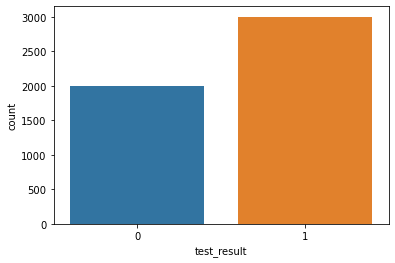

In [48]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

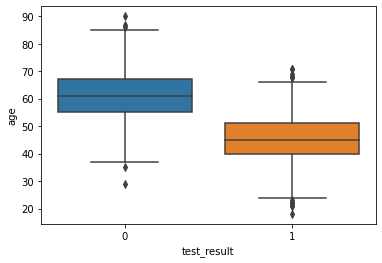

In [49]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

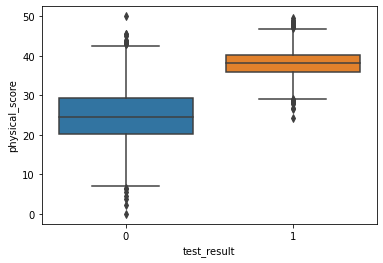

In [50]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

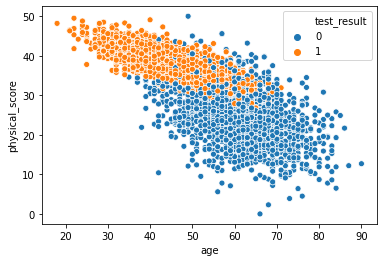

In [51]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

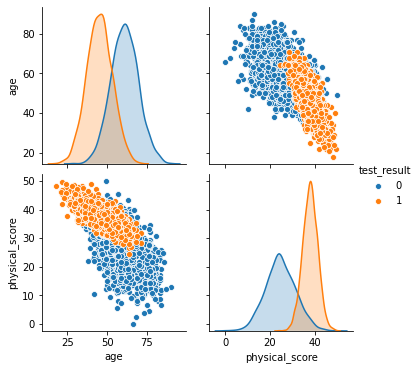

In [52]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

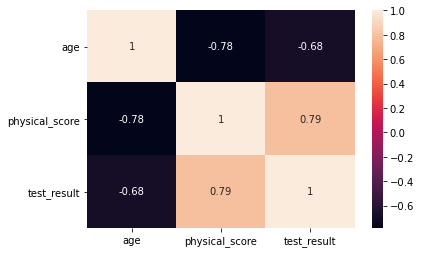

In [53]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

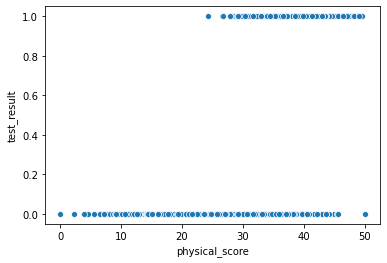

In [54]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

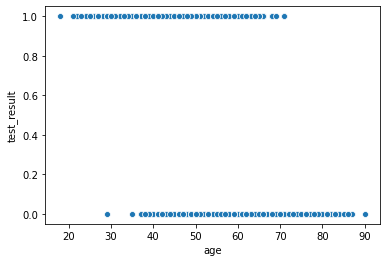

In [55]:
sns.scatterplot(x='age',y='test_result',data=df)

Различные виды графиков можно найти с помощью поиска в google! Например, поиск по фразе "3d matplotlib scatter plot" приведёт Вас к этой статье: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

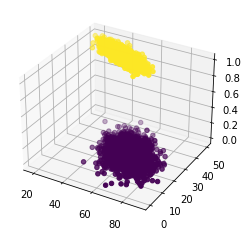

In [56]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### Разбиение на обучающую и тестовую выборки, а также масштабирование данных

In [6]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

In [11]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [12]:
# help(LogisticRegression)

In [14]:
help(LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model._logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.BaseEstimator)
 |  LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='deprecated', random_state=None, l1_ratios=None)
 |
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |
 |  See glossary entry for :term:`cross-validation estimator`.
 |
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  or lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |
 | 

In [19]:
log_model = LogisticRegressionCV()

In [20]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

### Интерпретация коэффициентов

На что обратить внимание:

* Эти коэффициенты характеризуют *шансы (odds)*, их нельзя интепретировать напрямую, как мы это делали для линейной регрессии.
* Мы обучали модель на *масштабированной* версии данных
* Намного проще понять и интерпретировать связь между коэффициентами (между одним коэффициентом и другом), чем связь между этими коэффициентами и целевой переменной.

Пожалуйста посмотрите видео-лекции по этой теме, а также почитайте следующие статьи:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### Соотношение "odds ratio"

Для непрерывной независимой переменной, соотношение "odds ratio" вычисляется так:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

Эта экспоненциальная связь служит интерпретацией для $$\beta _{1}$$ 

Шансы odds умножаются на $${e^\beta _{1}}$$ при каждом увеличении x на единицу.

In [67]:
log_model.C_

array([0.35938137])

In [15]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [68]:
log_model.coef_

array([[-0.96348842,  3.35442188]])

Чтобы получить соотношения "odds ratio", достаточно взять экспоненту от каждого из коэффициентов. Вы итоге мы можем понять, как увеличение или уменьшение на единицу той или иной переменной влияет на **шансы (odds)** пройти аудио-тест. 

In [69]:
# age,physical_score
np.exp(log_model.coef_[0])

array([ 0.38155952, 28.62904826])

Интерпретация:
* Мы можем ожидать, что **шансы (odds)** пройти аудио-тест **уменьшаются** (исходный коэффициент был отрицательный) при увеличении возраста на единицу.
* Мы можем ожидать, что **шансы (odds)** пройти аудио-тест **увеличиваются** (исходный коэффициент был положительный) при увеличении признака "физическое здоровье" на единицу.
* Сравнивая значения ratio между собой, мы видим, что признак physical_score обладает более сильной способностью влиять на предсказание, чем признак age.

### Точность модели на задачах классификации

In [16]:
#  Пожалуйста обратите внимание, что в будущих версиях Scikit-Learn
#  поменяется синтаксис для следующих методов:
#  - вместо plot_confusion_matrix нужно будет использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions.
#  - вместо plot_precision_recall_curve нужно будет использовать PrecisionRecallDisplay.from_estimator и PrecisionRecallDisplay.from_predictions
#  - вместо plot_roc_curve нужно будет использовать RocCurveDisplay.from_estimator и RocCurveDisplay.from_predictions

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

In [21]:
y_pred = log_model.predict(scaled_X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.932

In [23]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 13, 294]], dtype=int64)

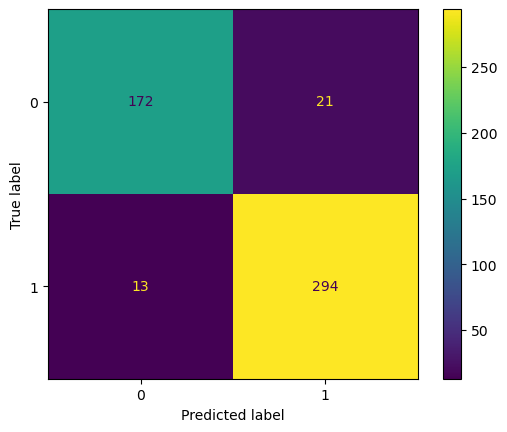

In [24]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

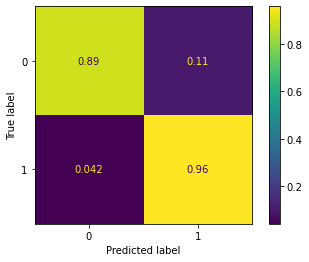

In [75]:
# Масштабированные данные: максимальное значение = 1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       193
           1       0.93      0.96      0.95       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [100]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [103]:
y_train.iloc[0]

1

In [105]:
# 0% вероятность класса 0
# 100% вероятность класса 1
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [106]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

## Изучаем график и область под графиком

**Подробности см. в видео-лекции!**

In [77]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [78]:
y_score = log_model.decision_function(X_test)

In [79]:
y_score.shape

(500,)

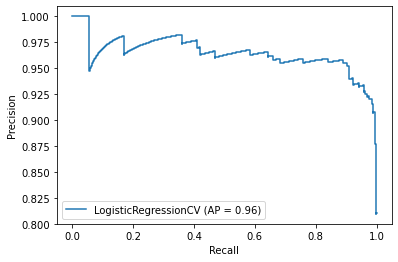

In [80]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

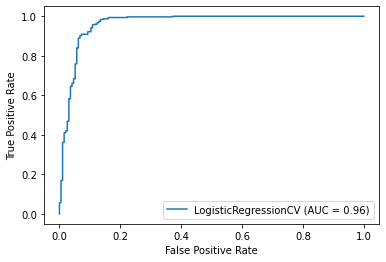

In [81]:
plot_roc_curve(log_model,scaled_X_test,y_test)

------
------

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [28]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [29]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [30]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [31]:
df.value_counts('test_result')

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

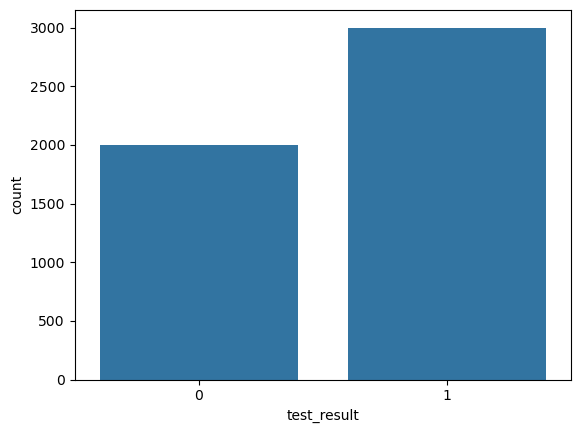

In [32]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

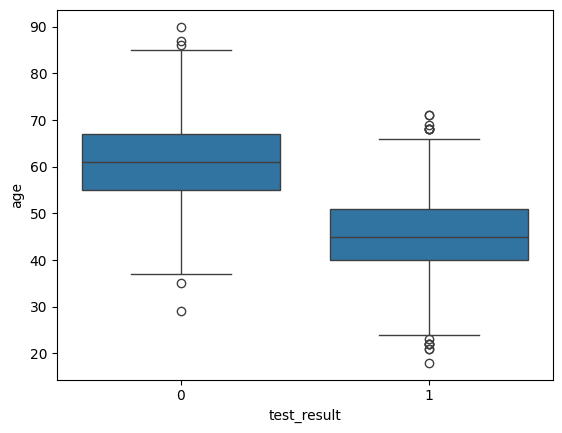

In [9]:
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

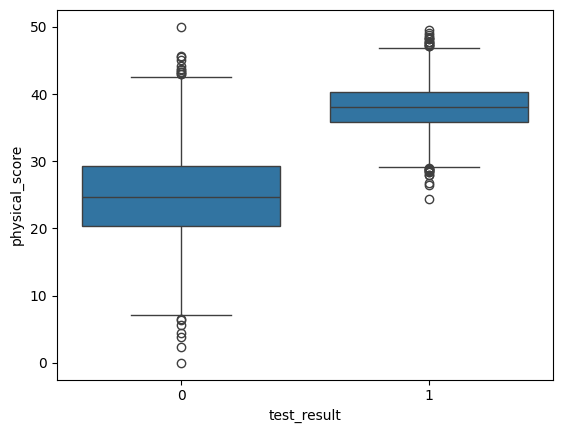

In [10]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

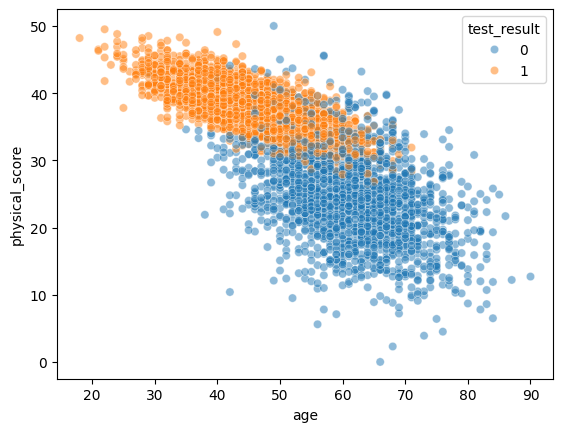

In [11]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

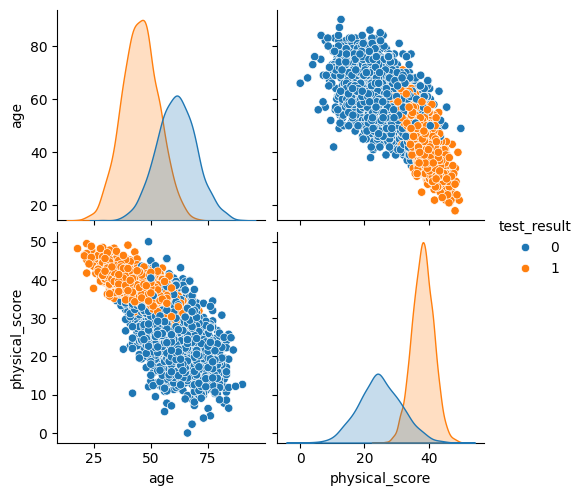

In [12]:
sns.pairplot(df, hue='test_result')

<Axes: >

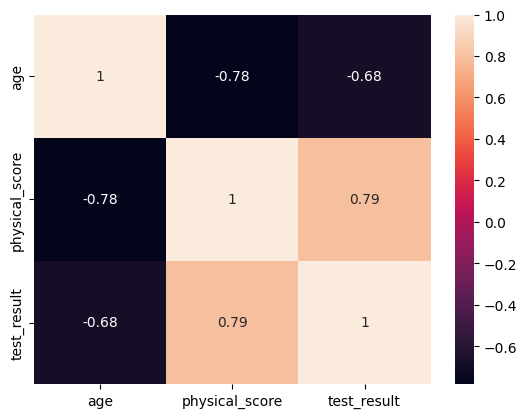

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

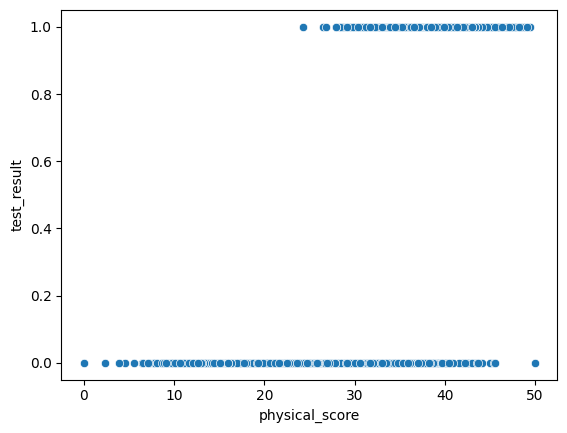

In [14]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

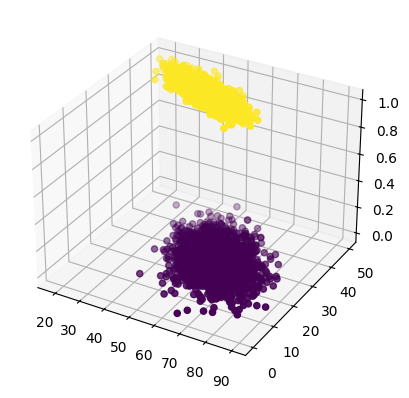

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [16]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [33]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X_train = scaler.fit_transform(X_train)

In [39]:
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [41]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [42]:
log_model = LogisticRegression()

In [43]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [44]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [45]:
y_pred = log_model.predict(scaled_X_test)

In [46]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [47]:
y_pred_proba = log_model.predict_proba(scaled_X_test)

In [48]:
y_pred_proba

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

[Text(0.5, 0.5, 'we'),
 Text(0.5, 0, 'sdf'),
 Text(0.5, 0, 'dsafs'),
 Text(0.5, 0.92, 'dfddf')]

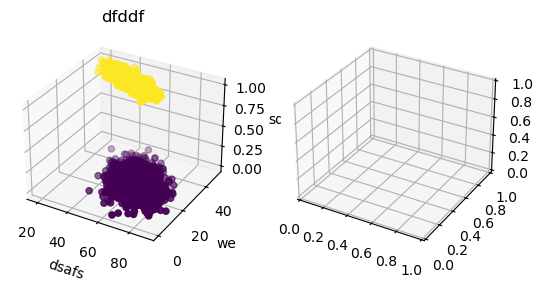

In [52]:
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
ax[0].scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])
ax[0].set(ylabel='we', zlabel='sdf', xlabel='dsafs', title='dfddf')

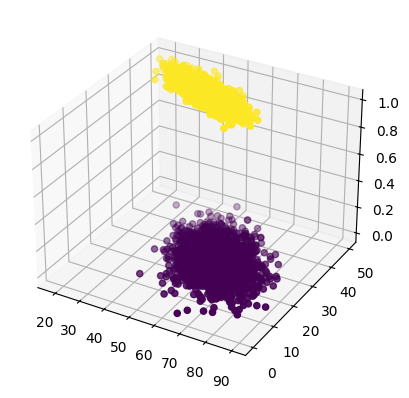

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [35]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [36]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [39]:
accuracy_score(y_test, y_pred)

0.93

In [40]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

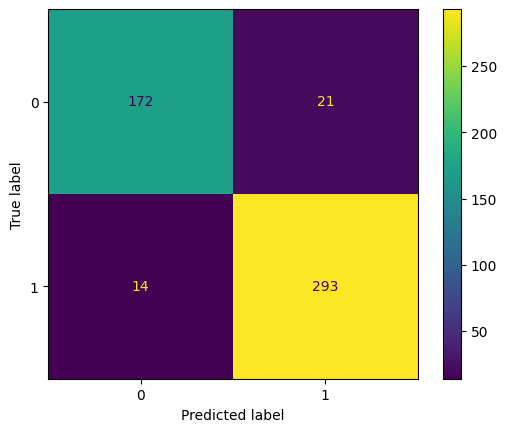

In [46]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

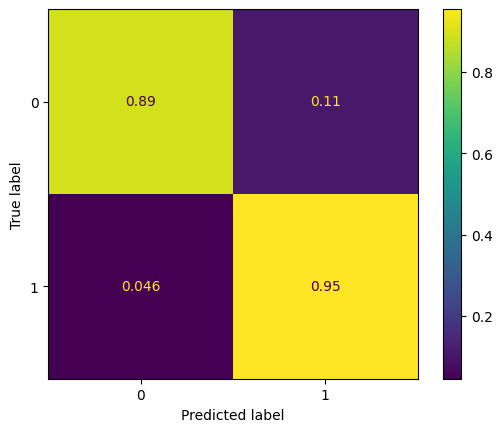

In [47]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='true')

In [48]:
len(y_test)

500

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [51]:
from sklearn.metrics import precision_score, recall_score

In [52]:
precision_score(y_test, y_pred)

0.9331210191082803

In [53]:
recall_score(y_test, y_pred)

0.9543973941368078

In [55]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

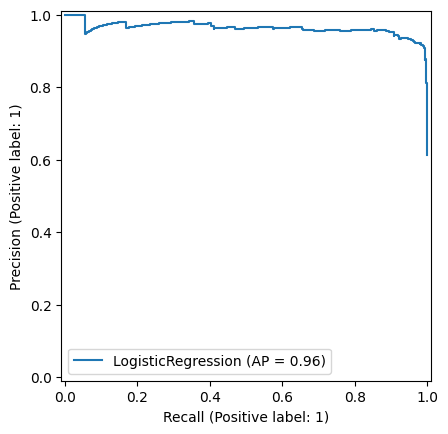

In [61]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

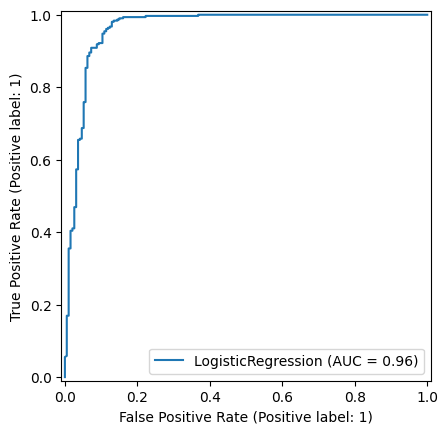

In [62]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [65]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [66]:
y_test[0]

1